In [2]:
from sklearn.metrics import classification_report


c:\Users\larak\anaconda3\envs\eods-f22\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


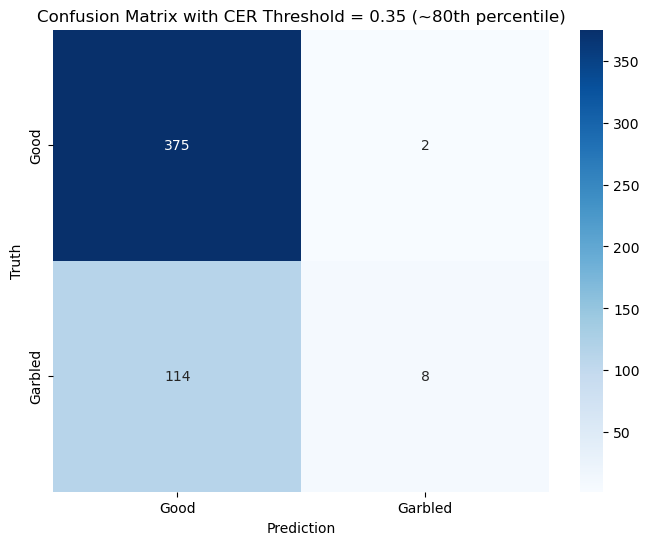

              precision    recall  f1-score   support

           0       0.77      0.99      0.87       377
           1       0.80      0.07      0.12       122

    accuracy                           0.77       499
   macro avg       0.78      0.53      0.49       499
weighted avg       0.77      0.77      0.68       499



In [3]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Read the enhanced results CSV
results_df = pd.read_csv("../calculate_cer/cer_results_enhanced_v2.csv", dtype='object')
results_df = results_df.iloc[:499]

# Create a binary column for truth (CER >= 0.35)
results_df['Truth'] = [0 if x=="FALSE" else 1 for x in results_df['CER > 0.35']]
results_df['Prediction'] = [0 if x=="FALSE" else 1 for x in results_df['Garbled?']]

# Generate confusion matrix
conf_matrix = confusion_matrix(results_df['Truth'], results_df['Prediction'])

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Good', 'Garbled'], yticklabels=['Good', 'Garbled'])
plt.title("Confusion Matrix with CER Threshold = 0.35 (~80th percentile)")
plt.xlabel("Prediction")
plt.ylabel("Truth")
plt.show()

classification_rep = classification_report(results_df['Truth'], results_df['Prediction'])
print(classification_rep)


              precision    recall  f1-score   support

           0       0.82      0.99      0.90       402
           1       0.70      0.07      0.13        97

    accuracy                           0.81       499
   macro avg       0.76      0.53      0.51       499
weighted avg       0.79      0.81      0.75       499



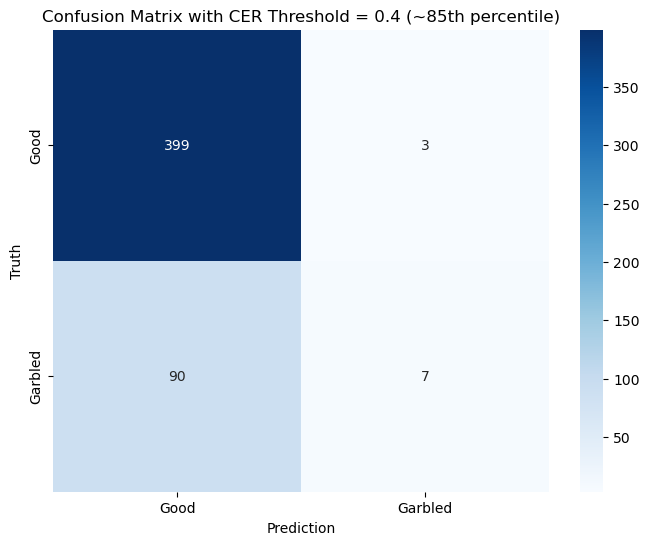

In [67]:
results_df['Truth'] = [0 if x=="FALSE" else 1 for x in results_df['CER > 0.4']]
results_df['Prediction'] = [0 if x=="FALSE" else 1 for x in results_df['Garbled?']]

# Generate confusion matrix
conf_matrix = confusion_matrix(results_df['Truth'], results_df['Prediction'])

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Good', 'Garbled'], yticklabels=['Good', 'Garbled'])
plt.title("Confusion Matrix with CER Threshold = 0.4 (~85th percentile)")
plt.xlabel("Prediction")
plt.ylabel("Truth")

classification_rep = classification_report(results_df['Truth'], results_df['Prediction'])
print(classification_rep)

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       441
           1       0.70      0.12      0.21        58

    accuracy                           0.89       499
   macro avg       0.80      0.56      0.57       499
weighted avg       0.87      0.89      0.86       499



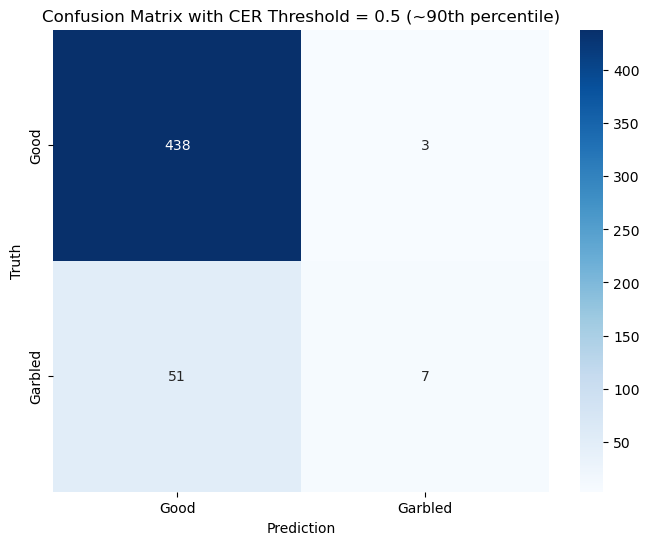

In [70]:
results_df['Truth'] = [0 if x=="FALSE" else 1 for x in results_df['CER > 0.5']]
results_df['Prediction'] = [0 if x=="FALSE" else 1 for x in results_df['Garbled?']]

# Generate confusion matrix
conf_matrix = confusion_matrix(results_df['Truth'], results_df['Prediction'])

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Good', 'Garbled'], yticklabels=['Good', 'Garbled'])
plt.title("Confusion Matrix with CER Threshold = 0.5 (~90th percentile)")
plt.xlabel("Prediction")
plt.ylabel("Truth")

classification_rep = classification_report(results_df['Truth'], results_df['Prediction'])
print(classification_rep)

In [26]:
CER = results_df['CER'].astype('float').iloc[1:]
Probability = results_df['Langdetect'].astype('float').iloc[1:]

In [15]:
CER.quantile(q=0.9)

0.5198599999999999

In [27]:
outliers = CER[CER > 1]
print(outliers)

166    1.7250
427    1.8726
435    1.2527
Name: CER, dtype: float64


Text(0, 0.5, 'Langdetect Probability')

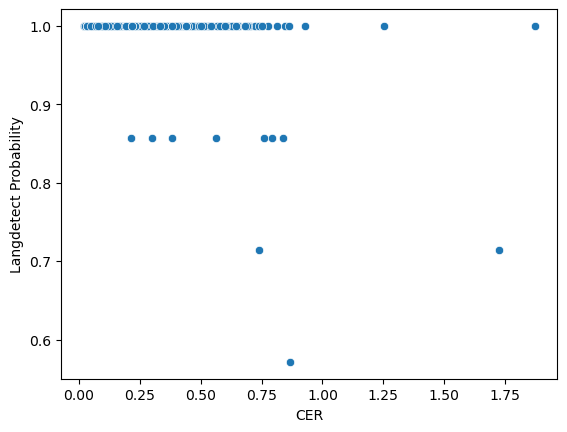

In [29]:
scatter = sns.scatterplot(x = CER, y = Probability)
scatter.set_ylabel('Langdetect Probability')

In [39]:
Probability.corr(1 - CER)

0.33089641407903847